In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'housing-prices-dataset' dataset.
Path to dataset files: /kaggle/input/housing-prices-dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Cek isi folder untuk melihat nama file
print(os.listdir(path))

# Misalnya nama filenya adalah 'Housing.csv'
file_path = os.path.join(path, "Housing.csv")

# Baca ke dataframe
data = pd.read_csv(file_path)
data.head()

['Housing.csv']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
data.info()
print('\n')
data.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB




,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [ ]:
data.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
data.duplicated().sum()

np.int64(0)

# Analisis Variabel Numerik & Visualisasi Korelasi

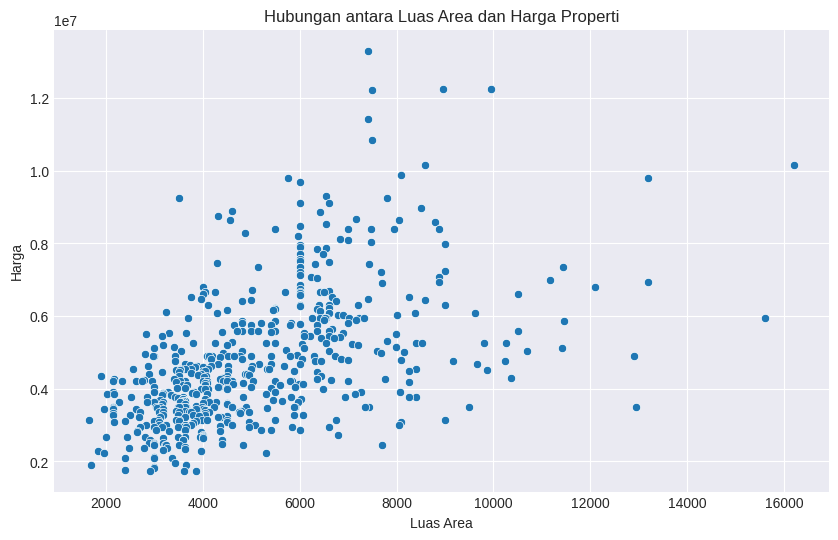

In [ ]:
# Scatter plot untuk melihat hubungan antara area dan harga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data)
plt.title('Hubungan antara Luas Area dan Harga Properti')
plt.xlabel('Luas Area')
plt.ylabel('Harga')
plt.show()

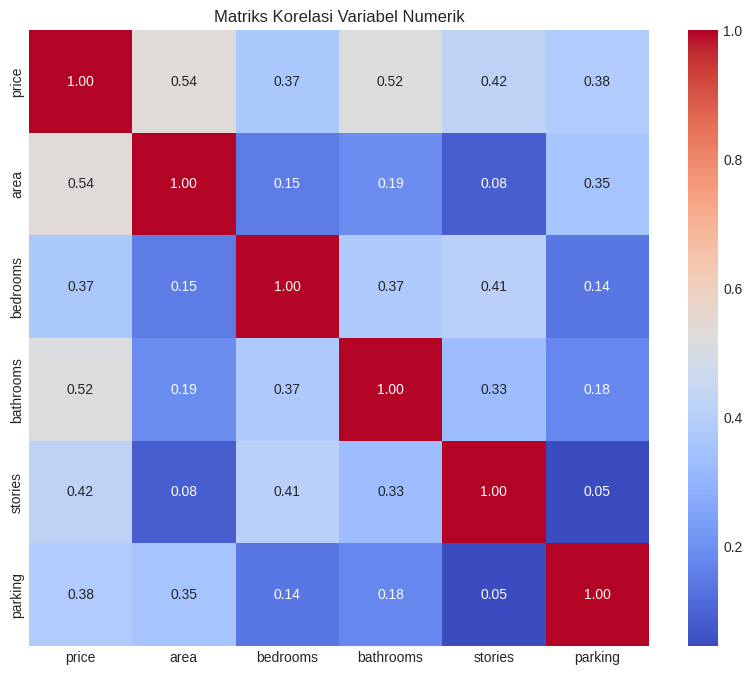

In [ ]:
# Matriks Korelasi (dengan heatmap)
# Pilih kolom numerik
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

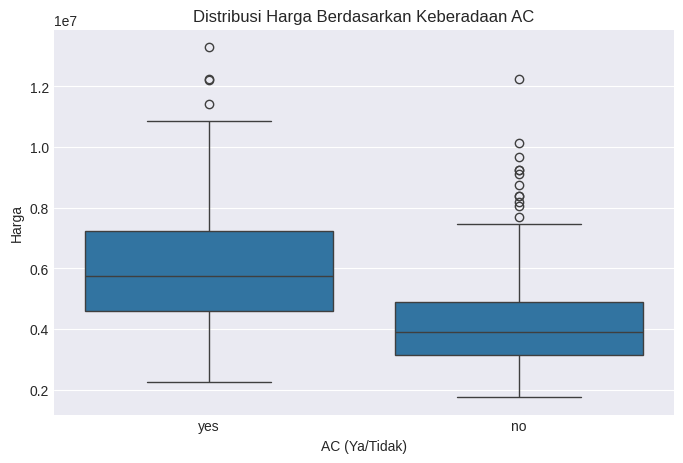

In [ ]:
# Box plot untuk melihat pengaruh airconditioning pada harga
plt.figure(figsize=(8, 5))
sns.boxplot(x='airconditioning', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan Keberadaan AC')
plt.xlabel('AC (Ya/Tidak)')
plt.ylabel('Harga')
plt.show()

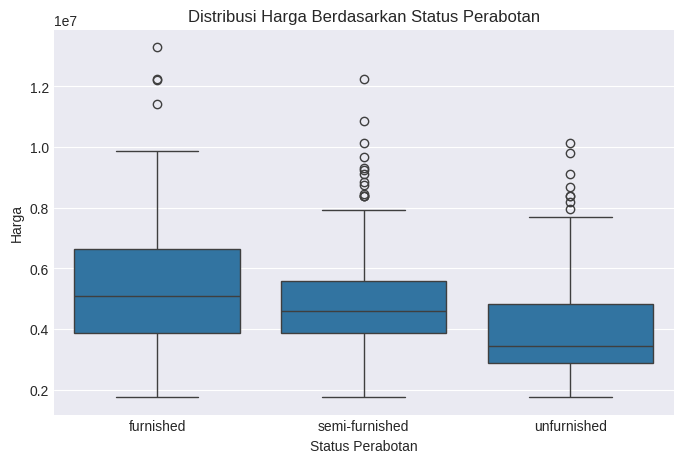

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='furnishingstatus', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan Status Perabotan')
plt.xlabel('Status Perabotan')
plt.ylabel('Harga')
plt.show()

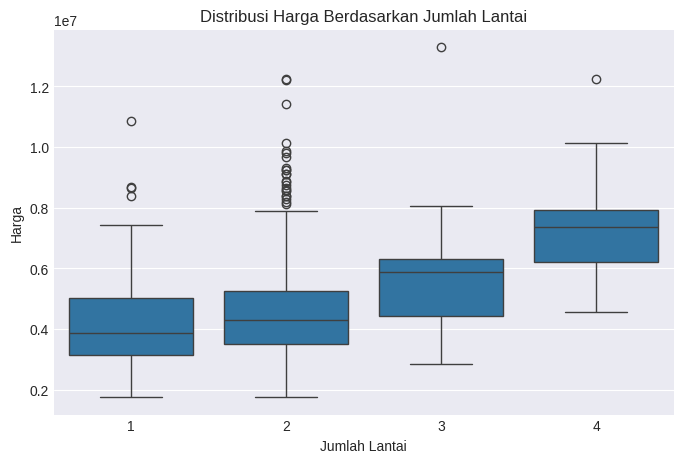

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='stories', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan Jumlah Lantai')
plt.xlabel('Jumlah Lantai')
plt.ylabel('Harga')
plt.show()

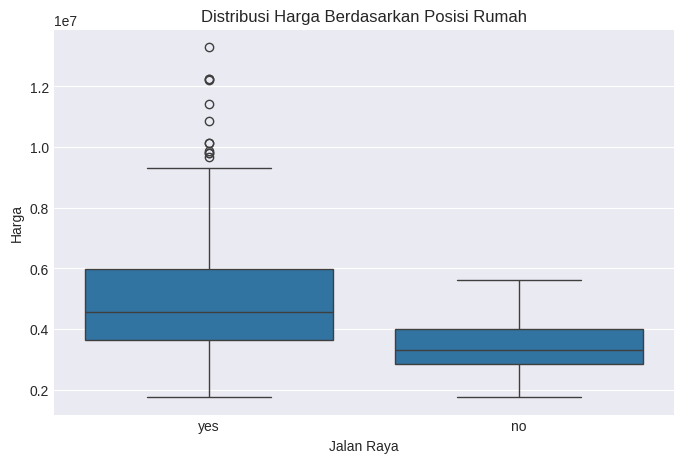

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='mainroad', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan Posisi Rumah')
plt.xlabel('Jalan Raya')
plt.ylabel('Harga')
plt.show()

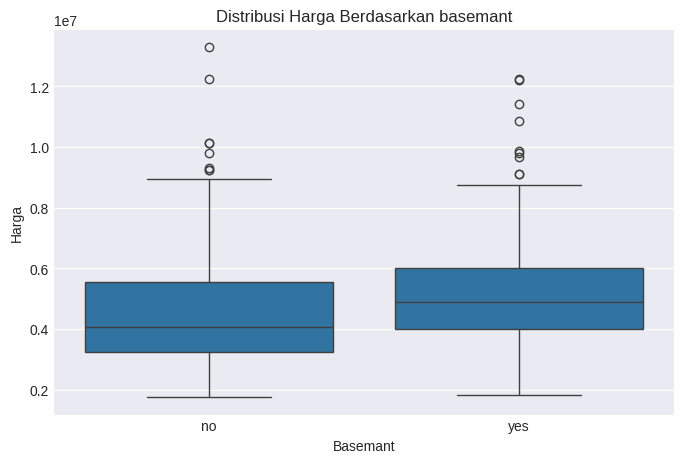

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='basement', y='price', data=data)
plt.title('Distribusi Harga Berdasarkan basemant')
plt.xlabel('Basemant')
plt.ylabel('Harga')
plt.show()

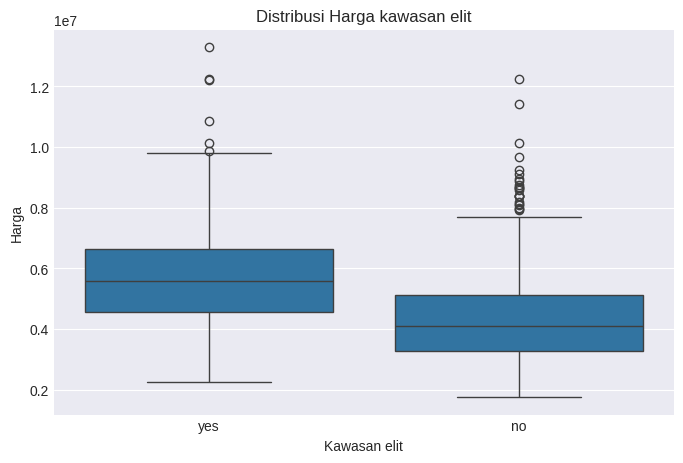

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='prefarea', y='price', data=data)
plt.title('Distribusi Harga kawasan elit')
plt.xlabel('Kawasan elit')
plt.ylabel('Harga')
plt.show()

In [ ]:
# Membuat fungsi untuk menggabungkan semua fitur menjadi satu teks deskriptif
def create_description(row):
    description = (
        f"rumah ini memiliki luas area sebesar {row['area']} meter persegi, "
        f"{row['bedrooms']} kamar tidur, dan {row['bathrooms']} kamar mandi. "
        f"rumah ini terdiri dari {row['stories']} lantai. "
        f"rumah ini berada {row['mainroad']} pinggir jalan raya, {row['guestroom']} memiliki ruang tamu, dan {row['basement']} memiliki basement. "
        f"rumah ini  {row['hotwaterheating']} disediakan waterheater dan {row['airconditioning']} memiliki ac. "
        f"Tersedia {row['parking']} tempat parkir. "
        f"rumah ini {row['prefarea']} berada di lingkungan yang diminati, dan kondisinya adalah {row['furnishingstatus']}."
        f"harga rumah ini adalah {row['price']}"
    )
    return description

data_descriptions = pd.DataFrame()
data_descriptions['description'] = data.apply(create_description, axis=1)

# Menampilkan 5 deskripsi pertama dari DataFrame baru
pd.set_option('display.max_colwidth', None)
print("DataFrame baru yang hanya berisi deskripsi:\n")
data_descriptions.head()

DataFrame baru yang hanya berisi deskripsi:



,description
0,"rumah ini memiliki luas area sebesar 7420 meter persegi, 4 kamar tidur, dan 2 kamar mandi. rumah ini terdiri dari 3 lantai. rumah ini berada yes pinggir jalan raya, no memiliki ruang tamu, dan no memiliki basement. rumah ini no disediakan waterheater dan yes memiliki ac. Tersedia 2 tempat parkir. rumah ini yes berada di lingkungan yang diminati, dan kondisinya adalah furnished.harga rumah ini adalah 13300000"
1,"rumah ini memiliki luas area sebesar 8960 meter persegi, 4 kamar tidur, dan 4 kamar mandi. rumah ini terdiri dari 4 lantai. rumah ini berada yes pinggir jalan raya, no memiliki ruang tamu, dan no memiliki basement. rumah ini no disediakan waterheater dan yes memiliki ac. Tersedia 3 tempat parkir. rumah ini no berada di lingkungan yang diminati, dan kondisinya adalah furnished.harga rumah ini adalah 12250000"
2,"rumah ini memiliki luas area sebesar 9960 meter persegi, 3 kamar tidur, dan 2 kamar mandi. rumah ini terdiri dari 2 lantai. rumah ini berada yes pinggir jalan raya, no memiliki ruang tamu, dan yes memiliki basement. rumah ini no disediakan waterheater dan no memiliki ac. Tersedia 2 tempat parkir. rumah ini yes berada di lingkungan yang diminati, dan kondisinya adalah semi-furnished.harga rumah ini adalah 12250000"
3,"rumah ini memiliki luas area sebesar 7500 meter persegi, 4 kamar tidur, dan 2 kamar mandi. rumah ini terdiri dari 2 lantai. rumah ini berada yes pinggir jalan raya, no memiliki ruang tamu, dan yes memiliki basement. rumah ini no disediakan waterheater dan yes memiliki ac. Tersedia 3 tempat parkir. rumah ini yes berada di lingkungan yang diminati, dan kondisinya adalah furnished.harga rumah ini adalah 12215000"
4,"rumah ini memiliki luas area sebesar 7420 meter persegi, 4 kamar tidur, dan 1 kamar mandi. rumah ini terdiri dari 2 lantai. rumah ini berada yes pinggir jalan raya, yes memiliki ruang tamu, dan yes memiliki basement. rumah ini no disediakan waterheater dan yes memiliki ac. Tersedia 2 tempat parkir. rumah ini no berada di lingkungan yang diminati, dan kondisinya adalah furnished.harga rumah ini adalah 11410000"


In [ ]:
csv_filename = 'knowledge_base.csv'
data_descriptions.to_csv(csv_filename, index=False, encoding='utf-8')
print(f"Basis pengetahuan berhasil disimpan sebagai '{csv_filename}'")

Basis pengetahuan berhasil disimpan sebagai 'knowledge_base.csv'


# Data Preprocessing

In [ ]:
data.describe().round(2)

,price,area,bedrooms,bathrooms,stories,parking
count,545.00,545.00,545.00,545.00,545.00,545.00
mean,4766729.25,5150.54,2.97,1.29,1.81,0.69
std,1870439.62,2170.14,0.74,0.50,0.87,0.86
min,1750000.00,1650.00,1.00,1.00,1.00,0.00
25%,3430000.00,3600.00,2.00,1.00,1.00,0.00
50%,4340000.00,4600.00,3.00,1.00,2.00,0.00
75%,5740000.00,6360.00,3.00,2.00,2.00,1.00
max,13300000.00,16200.00,6.00,4.00,4.00,3.00


In [ ]:

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Kolom yang akan diubah menjadi 1 dan 0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Mengubah 'yes' dan 'no' menjadi 1 dan 0
for col in binary_cols:
    data[col] = data[col].map({'yes': 1, 'no': 0})

print("DataFrame setelah biner encoding:")
data.head()

DataFrame setelah biner encoding:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
data['furnishingstatus'] = data['furnishingstatus'].replace({
'furnished': 2,
'semi-furnished': 1,
'unfurnished': 0
})
# Tampilkan DataFrame setelah perubahan

print("DataFrame setelah mengubah 'furnishingstatus' sesuai urutan:")

data.head()

DataFrame setelah mengubah 'furnishingstatus' sesuai urutan:


/tmp/ipython-input-2763650447.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['furnishingstatus'] = data['furnishingstatus'].replace({


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


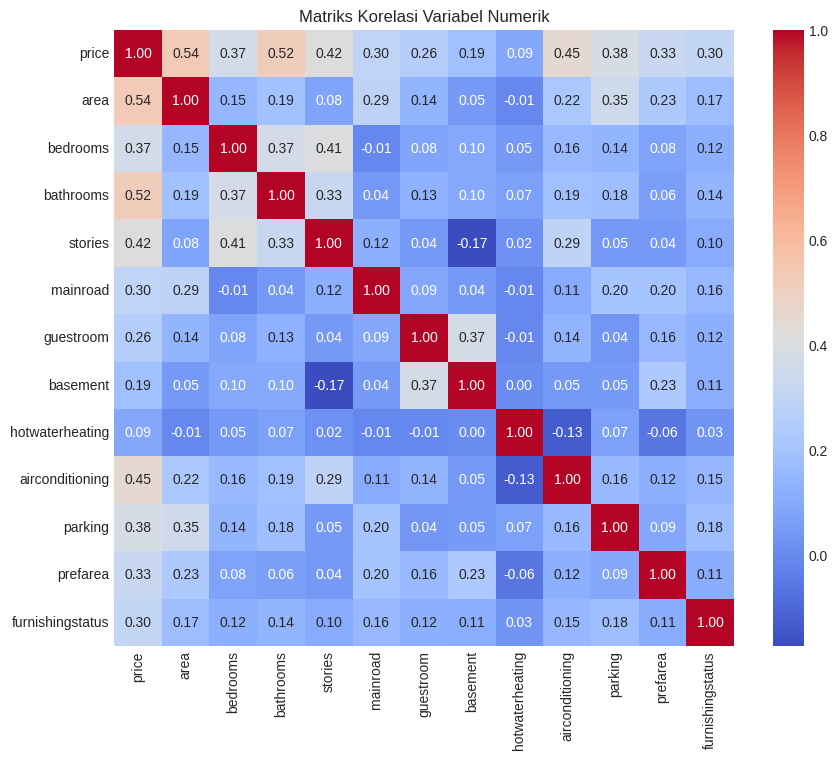

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

In [ ]:
columns_to_check = ['price', 'area']

for col in columns_to_check:
    # Hitung Q1, Q3, dan IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Simpan jumlah baris sebelum menghilangkan outlier
    rows_before = data.shape[0]

    # Hilangkan outlier
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

    # Simpan jumlah baris setelah menghilangkan outlier
    rows_after = data.shape[0]

    # Tampilkan hasilnya
    print(f"Outlier pada kolom '{col}' telah dihapus.")
    print(f"{rows_before - rows_after} baris data dihapus.")
    print(f"Jumlah data tersisa: {rows_after}\n")

# Tampilkan beberapa baris pertama dari data yang sudah bersih
print("Data setelah outlier dihilangkan:")
data.head()

Outlier pada kolom 'price' telah dihapus.
15 baris data dihapus.
Jumlah data tersisa: 530

Outlier pada kolom 'area' telah dihapus.
13 baris data dihapus.
Jumlah data tersisa: 517

Data setelah outlier dihilangkan:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
# Pisahkan target (price) dari fitur
y = data['price']
X = data.drop('price', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

# Latih scaler pada data pelatihan
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model
model = LinearRegression()

# Latih model menggunakan data pelatihan
# Ingat, kita menggunakan data yang sudah di-scaled
model.fit(X_train_scaled, y_train)

print("Model telah berhasil dilatih.")

Model telah berhasil dilatih.



Mean Absolute Error (MAE): 742678.29
Mean Squared Error (MSE): 977664860283.97
Root Mean Squared Error (RMSE): 988769.37
R-squared (R²): 0.67


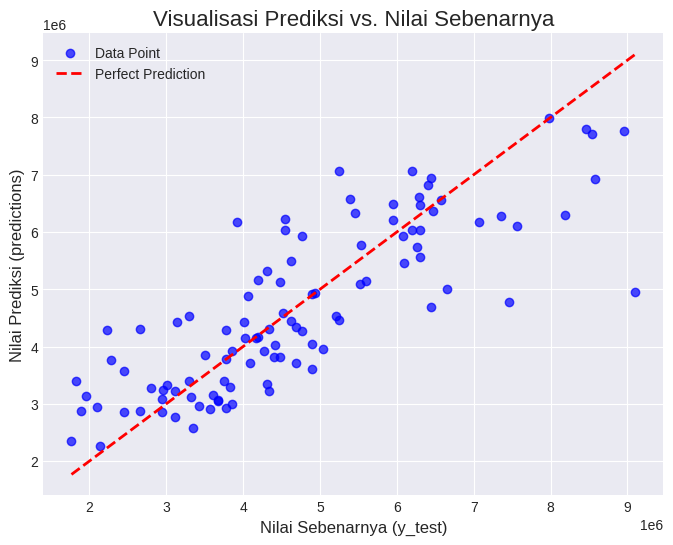

Scatter plot yang membandingkan nilai prediksi dengan nilai sebenarnya telah dibuat.


In [ ]:
# Import library metrik evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membuat prediksi pada data pengujian
predictions = model.predict(X_test_scaled)

# Evaluasi kinerja model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) # Root Mean Squared Error
r2 = r2_score(y_test, predictions)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


# Atur style plot
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8-darkgrid')

# Visualisasi
plt.figure(figsize=(8, 6
                    ))

# Scatter plot dari nilai sebenarnya vs. nilai prediksi
# Plot ini menunjukkan seberapa dekat prediksi kita dengan nilai sebenarnya
plt.scatter(y_test, predictions, alpha=0.7, color='b', label='Data Point')

# Garis diagonal yang sempurna (perfect prediction line)
# Garis ini mewakili di mana prediksi sama persis dengan nilai sebenarnya
# Contoh, jika y_test = 100, prediksi juga 100
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')

# Judul dan label
plt.title('Visualisasi Prediksi vs. Nilai Sebenarnya', fontsize=16)
plt.xlabel('Nilai Sebenarnya (y_test)', fontsize=12)
plt.ylabel('Nilai Prediksi (predictions)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("Scatter plot yang membandingkan nilai prediksi dengan nilai sebenarnya telah dibuat.")

Memulai pelatihan model XGBoost...
Pelatihan model selesai.

R-squared (R²): 0.662


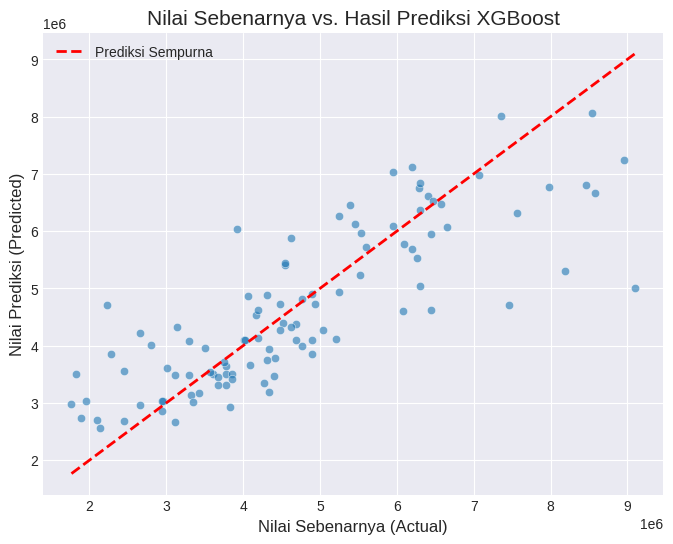

In [ ]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Asumsikan X_train, X_test, y_train, y_test sudah tersedia

# --- 1. INISIALISASI & PELATIHAN MODEL (VERSI LAMA) ---

# Inisialisasi model DENGAN early_stopping_rounds di dalamnya
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    early_stopping_rounds=20,  # <-- PARAMETER DIPINDAHKAN KE SINI
    random_state=42,
    n_jobs=-1
)

# Latih model HANYA dengan eval_set di dalam .fit()
print("Memulai pelatihan model XGBoost...")
xgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)], # eval_set tetap di sini
    verbose=False
)
print("Pelatihan model selesai.")


# --- 2. PREDIKSI & EVALUASI ---

# Lakukan prediksi pada data test
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Hitung metrik evaluasi
r2_xgb = metrics.r2_score(y_test, y_pred_xgb)
print(f"\nR-squared (R²): {r2_xgb:.3f}")

# Pada versi lama, untuk melihat jumlah pohon terbaik, aksesnya sedikit berbeda
# Namun, model yang Anda gunakan sudah merupakan model terbaik secara otomatis
# print(f"Jumlah pohon optimal (Best N Estimators): {xgb_model.best_iteration}") # Ini mungkin tidak berfungsi di versi sangat lama


# --- 3. VISUALISASI ---
# (Kode visualisasi tetap sama)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Prediksi Sempurna')
plt.title('Nilai Sebenarnya vs. Hasil Prediksi XGBoost', fontsize=15)
plt.xlabel('Nilai Sebenarnya (Actual)', fontsize=12)
plt.ylabel('Nilai Prediksi (Predicted)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()